# Construction of data and prediction of  base Parameters for Noise Isolation 

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import random
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [29]:
x=np.linspace(1, 10, 150)

In [30]:
#fuctions

#linear
def linear(m,c):
    y=m*x+c
    return y

#gaussian
def gaussian(mu,sigma,a):
    gu=((a * np.exp( - (x - mu)**2 / (2 * sigma**2) )))
    return gu

In [31]:
# genration of signals
#noisy 
def calcN():
    m=random.uniform(.1,2)
    mu=random.uniform(3,6)
    sigma=random.uniform(.1,2)
    c=random.uniform(0,3)
    a=random.uniform(2,6)
    noise=(np.random.normal(0,.1,150))
    li=linear(m,c)
    gaus=gaussian(mu,sigma,a)
    sig=li+gaus+noise
    return sig,m,mu,sigma,c,a,x
#without Noise
def calcC():
    m=random.uniform(0,2)
    mu=random.uniform(0,6)
    sigma=random.uniform(.1,2)
    c=random.uniform(0,3)
    a=random.uniform(0,6)
    noise=(np.random.normal(0,.1,150))
    li=linear(m,c)
    gaus=gaussian(mu,sigma,a)
    sig=li+gaus
    return sig,m,mu,sigma,c,a,x


In [32]:

#without noise
signal=[ calcC() for i in range(4000)]
#with noise
signal2=[ calcN() for i in range(2000)]
#signal is a numpy array

In [33]:
#genarate dataframes without noise
df = pd.DataFrame(signal)
signals=(df[0])
m=df[1]
mu=df[2]
sigma=df[3]
c=df[4]
a=df[5]
x=df[6]

#genarate dataframes with noise
df2 = pd.DataFrame(signal2)
signals2=(df2[0])
m2=df2[1]
mu2=df2[2]
sigma2=df2[3]
c2=df2[4]
a2=df2[5]
x2=df2[6]

In [34]:
#proper Array conversion 
#without noise
signw=[[ signals[i][j] for j in range(150)] for i in range(4000)]

#with noise
signw2=[[ signals2[i][j] for j in range(150)] for i in range(2000)]

In [35]:
#form a pandas dataframe without noise
data={'signal':signw,
        'mu':df[2], 
        'sigma':df[3], 
        'amplitude':df[5],
        'slope':df[1],
        'constant':df[4]
        }
DatasetC =pd.DataFrame(data,columns = ['signal', 'mu', 'sigma', 'amplitude','slope','constant'])

#form a pandas dataframe with noise
data={'signal':signw2,
        'mu':df2[2], 
        'sigma':df2[3], 
        'amplitude':df2[5],
        'slope':df2[1],
        'constant':df2[4]
        }
DatasetN =pd.DataFrame(data,columns = ['signal', 'mu', 'sigma', 'amplitude','slope','constant'])



In [36]:
#save data to CSV
#Dataset2.to_csv('signal.csv')

In [109]:
DatasetC[:5]

,signal,mu,sigma,amplitude,slope,constant
0,"[3.03617636021, 3.12354553282, 3.21378533091, ...",3.525113,1.044436,3.041374,1.045172,1.827396
1,"[6.20444455022, 6.25529865883, 6.29917730153, ...",0.733320,1.319496,3.659098,1.450103,1.169217
2,"[6.0809705668, 6.09528944307, 6.10144609765, 6...",0.630079,0.742606,2.198992,1.615962,2.522602
3,"[3.46961415012, 3.58488213867, 3.70015100252, ...",3.556370,0.472827,2.177071,1.908310,1.561303
4,"[4.93825042596, 5.01506772731, 5.091087768, 5....",0.246739,1.687690,0.911029,1.496713,2.616878


In [111]:
DatasetN[:5]

,signal,mu,sigma,amplitude,slope,constant
0,"[2.41228380224, 2.48438925791, 2.79660720304, ...",5.572910,1.769763,4.919575,0.948330,1.317692
1,"[2.27442932107, 2.45701398407, 2.54609334696, ...",3.511228,0.708826,2.645008,1.308834,1.033855
2,"[3.14018284117, 3.0731935328, 3.42088457425, 3...",5.659399,1.770733,4.422514,0.613850,2.511995
3,"[3.24357931103, 3.43598322601, 3.2900182282, 3...",5.389867,1.561555,5.362447,1.335072,1.831473
4,"[2.70604124452, 2.70720754619, 2.89442412667, ...",4.146371,1.767453,5.962685,0.722956,0.701456


#split dataset

In [39]:
#for M
X_trainM, X_testM, y_trainM, y_testM = train_test_split(signw,m,test_size=0.5)
# for A
X_trainA, X_testA, y_trainA, y_testA = train_test_split(signw,a,test_size=0.5)
#for C
X_trainC, X_testC, y_trainC, y_testC = train_test_split(signw,c,test_size=0.5)
#for Mu
X_trainMu, X_testMu, y_trainMu, y_testMu = train_test_split(signw,mu,test_size=0.5)
#for Sigma
X_trainS, X_testS, y_trainS, y_testS = train_test_split(signw,sigma,test_size=0.5)

# Wthout Noise in Traning and Noisy data for Testing

# SVR Prediction Module



In [40]:
#for M 
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_trainM,y_trainM) 
SVR(C=1.0, cache_size=2002, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-10, shrinking=True, tol=0.001, verbose=False)
P1=clf.predict(X_testM)
MC=mean_squared_error(y_testM,P1)
y1=clf.score(signw2,y_testM)

#for A
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_trainA,y_trainA) 
SVR(C=1.0, cache_size=2002, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-10, shrinking=True, tol=0.001, verbose=False)
P2=clf.predict(X_testA)
MC2=mean_squared_error(y_testA,P2)
y2=clf.score(signw2,y_testA)

#for C
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_trainC,y_trainC) 
SVR(C=1.0, cache_size=2002, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-10, shrinking=True, tol=0.001, verbose=False)
P3=clf.predict(X_testC)
MC3=mean_squared_error(y_testC,P3)
y3=clf.score(signw2,y_testC)

# for Mu
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_trainMu,y_trainMu) 
SVR(C=1.0, cache_size=2002, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-10, shrinking=True, tol=0.001, verbose=False)
P4=clf.predict(X_testMu)
MC4=mean_squared_error(y_testMu,P4)
y4=clf.score(signw2,y_testMu)

#for Sigma

clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_trainS,y_trainS) 
SVR(C=1.0, cache_size=2002, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-10, shrinking=True, tol=0.001, verbose=False)
P5=clf.predict(X_testS)
MC5=mean_squared_error(y_testS,P3)
y5=clf.score(signw2,y_testS)


avg=(y1+y2+y3+y4+y5)/5
print('Average Accuracy of SVR for four parameters for a dataset of 1000 values is ',avg*100,'%')
err=(MC+MC2+MC3+MC4+MC5)/5
print('Average error rate of SVR for four parameters for a dataset of 1000 values is ',err)

Average Accuracy of SVR for four parameters for a dataset of 1000 values is  -67.1267041095 %
Average error rate of SVR for four parameters for a dataset of 1000 values is  0.434404032878


# Descision forest regression

In [41]:
#for M
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_trainM, y_trainM)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

CC=regr.predict(X_testM)
RR=mean_squared_error(y_testM,CC)
y11=regr.score(signw2,y_testM)

#for A
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_trainA, y_trainA)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

CC2=regr.predict(X_testA)
RR2=mean_squared_error(y_testA,CC2)
y22=regr.score(signw2,y_testA)

#for C
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_trainC, y_trainC)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

CC3=regr.predict(X_testC)
RR3=mean_squared_error(y_testC,CC3)
y33=regr.score(signw2,y_testC
              )
#for MU
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_trainMu, y_trainMu)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

CC4=regr.predict(X_testMu)
RR4=mean_squared_error(y_testMu,CC4)
y44=regr.score(signw2,y_testMu)
#for Sigma
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_trainS, y_trainS)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

CC5=regr.predict(X_testS)
RR5=mean_squared_error(y_testS,CC5)
y55=regr.score(signw2,y_testS)



avg2=(y11+y22+y33+y44+y55)/5
print('Average Accuracy of Descision forest regressor for four parameters for a dataset of 1000 values is ',avg2*100,'%')
err2=(RR+RR2+RR3+RR4+RR5)/5
print('Average error of Descision forest regressor for four parameters for a dataset of 1000 values is ',err2)

Average Accuracy of Descision forest regressor for four parameters for a dataset of 1000 values is  -42.4783619063 %
Average error of Descision forest regressor for four parameters for a dataset of 1000 values is  0.78667771509


# Boosted Decision tree regression

In [43]:
#for M
regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)
regr.fit(X_trainM, y_trainM)
PP=regr.predict(X_testM)
g1=regr.score(signw2,y_testM)
oo=mean_squared_error(y_testM,PP)

#for A

regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=12),
                          n_estimators=300)
regr.fit(X_trainA, y_trainA)
PP2=regr.predict(X_testA)
g2=regr.score(signw2,y_testA)
oo2=mean_squared_error(y_testA,PP2)

#for C

regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=12),
                          n_estimators=300)
regr.fit(X_trainC, y_trainC)
PP3=regr.predict(X_testC)
g3=regr.score(signw2,y_testC)
oo3=mean_squared_error(y_testC,PP3)

#for Mu

regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=12),
                          n_estimators=300)
regr.fit(X_trainMu, y_trainMu)
PP4=regr.predict(X_testMu)
g4=regr.score(signw2,y_testMu)
oo4=mean_squared_error(y_testMu,PP4)

#for Sigma

regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=12),
                          n_estimators=300)
regr.fit(X_trainS, y_trainS)
PP5=regr.predict(X_testS)
g5=regr.score(signw2,y_testS)
oo5=mean_squared_error(y_testS,PP5)

avg3=(g1+g2+g3+g4+g5)/5
print('Average Accuracy of boosted Descision Tree for four parameters for a dataset of 1000 values is ',avg3*100,'%')
err3=(oo+oo2+oo3+oo4+oo5)/5
print('Average Accuracy of boosted Descision Tree for four parameters for a dataset of 1000 values is ',err3)

Average Accuracy of boosted Descision Tree for four parameters for a dataset of 1000 values is  -67.6926196254 %
Average Accuracy of boosted Descision Tree for four parameters for a dataset of 1000 values is  0.341342382613


# prediction of Data with noise function added to signals before Traning 

In [44]:
#spliiting the DATA

#for M
X_trainM, X_testM, y_trainM, y_testM = train_test_split(signw2,m2,test_size=0.5)
# for A
X_trainA, X_testA, y_trainA, y_testA = train_test_split(signw2,a2,test_size=0.5)
#for C
X_trainC, X_testC, y_trainC, y_testC = train_test_split(signw2,c2,test_size=0.5)
#for Mu
X_trainMu, X_testMu, y_trainMu, y_testMu = train_test_split(signw2,mu2,test_size=0.5)
#for Sigma
X_trainS, X_testS, y_trainS, y_testS = train_test_split(signw2,sigma2,test_size=0.5)

# SVR prediction module

In [45]:
#for M 
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_trainM,y_trainM) 
SVR(C=1.0, cache_size=2002, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-10, shrinking=True, tol=0.001, verbose=False)
P1=clf.predict(X_testM)
MCn=mean_squared_error(y_testM,P1)
y1n=clf.score(X_testM,y_testM)

#for A
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_trainA,y_trainA) 
SVR(C=1.0, cache_size=2002, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-10, shrinking=True, tol=0.001, verbose=False)
P2=clf.predict(X_testA)
MC2n=mean_squared_error(y_testA,P2)
y2n=clf.score(X_testA,y_testA)

#for C
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_trainC,y_trainC) 
SVR(C=1.0, cache_size=2002, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-10, shrinking=True, tol=0.001, verbose=False)
P3=clf.predict(X_testC)
MC3n=mean_squared_error(y_testC,P3)
y3n=clf.score(X_testC,y_testC)

# for Mu
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_trainMu,y_trainMu) 
SVR(C=1.0, cache_size=2002, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-10, shrinking=True, tol=0.001, verbose=False)
P4=clf.predict(X_testMu)
MC4n=mean_squared_error(y_testMu,P4)
y4n=clf.score(X_testMu,y_testMu)

#for Sigma

clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_trainS,y_trainS) 
SVR(C=1.0, cache_size=2002, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-10, shrinking=True, tol=0.001, verbose=False)
P5=clf.predict(X_testS)
MC5n=mean_squared_error(y_testS,P3)
y5n=clf.score(X_testS,y_testS)


avg11=(y1n+y2n+y3n+y4n+y5n)/5
print('Average Accuracy of SVR for four parameters for a dataset of 1000 values is ',avg11*100,'%')
err11=(MCn+MC2n+MC3n+MC4n+MC5n)/5
print('Average error rate of SVR for four parameters for a dataset of 1000 values is ',err11)

Average Accuracy of SVR for four parameters for a dataset of 1000 values is  86.5690380806 %
Average error rate of SVR for four parameters for a dataset of 1000 values is  0.252490434774


# Descision forest regression

In [46]:
#for M
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_trainM,y_trainM)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

CC=regr.predict(X_testM)
RRn=mean_squared_error(y_testM,CC)
y11n=regr.score(X_testM,y_testM)

#for A
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_trainA, y_trainA)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

CC2=regr.predict(X_testA)
RR2n=mean_squared_error(y_testA,CC2)
y22n=regr.score(X_testA,y_testA)

#for C
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_trainC, y_trainC)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

CC3=regr.predict(X_testC)
RR3n=mean_squared_error(y_testC,CC3)
y33n=regr.score(X_testC,y_testC)

#for MU
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_trainMu, y_trainMu)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

CC4=regr.predict(X_testMu)
RR4n=mean_squared_error(y_testMu,CC4)
y44n=regr.score(X_testMu,y_testMu)

#for Sigma
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_trainS, y_trainS)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

CC5=regr.predict(X_testS)
RR5n=mean_squared_error(y_testS,CC5)
y55n=regr.score(X_testS,y_testS)



avg22=(y11n+y22n+y33n+y44n+y55n)/5
print('Average Accuracy of Descision forest regressor for four parameters for a dataset of 1000 values is ',avg22*100,'%')
err22=(RRn+RR2n+RR3n+RR4n+RR5n)/5
print('Average error of Descision forest regressor for four parameters for a dataset of 1000 values is ',err22)

Average Accuracy of Descision forest regressor for four parameters for a dataset of 1000 values is  63.7971937166 %
Average error of Descision forest regressor for four parameters for a dataset of 1000 values is  0.294807041004


# Boosted Decision tree regression

In [50]:
#for M
regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)
regr.fit(X_trainM, y_trainM)
PP=regr.predict(X_testM)
g1n=regr.score(X_testM,y_testM)
oon=mean_squared_error(y_testM,PP)

#for A

regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=12),
                          n_estimators=300)
regr.fit(X_trainA, y_trainA)
PP2=regr.predict(X_testA)
g2n=regr.score(X_testA,y_testA)
oo2n=mean_squared_error(y_testA,PP2)

#for C

regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=12),
                          n_estimators=300)
regr.fit(X_trainC, y_trainC)
PP3=regr.predict(X_testC)
g3n=regr.score(X_testC,y_testC)
oo3n=mean_squared_error(y_testC,PP3)

#for Mu

regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=12),
                          n_estimators=300)
regr.fit(X_trainMu, y_trainMu)
PP4=regr.predict(X_testMu)
g4n=regr.score(X_testMu,y_testMu)
oo4n=mean_squared_error(y_testMu,PP4)

#for Sigma

regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=12),
                          n_estimators=300)
regr.fit(X_trainS, y_trainS)
PP5=regr.predict(X_testS)
g5n=regr.score(X_testS,y_testS)
oo5n=mean_squared_error(y_testS,PP5)

avg33=(g1n+g2n+g3n+g4n+g5n)/5
print('Average Accuracy of boosted Descision Tree for four parameters for a dataset of 1000 values is ',avg33*100,'%')
err33=(oon+oo2n+oo3n+oo4n+oo5n)/5
print('Average Accuracy of boosted Descision Tree for four parameters for a dataset of 1000 values is ',err33)

Average Accuracy of boosted Descision Tree for four parameters for a dataset of 1000 values is  87.8670217704 %
Average Accuracy of boosted Descision Tree for four parameters for a dataset of 1000 values is  0.100793696828


In [87]:

d1 = {
      'Algo': ['SVR', 'DFR','BDTR'], 
      'ERR M': [MC,RR,oo],
      'ERR A':[MC2,RR2,oo2],
      'ERR C':[MC3,RR3,oo3],
      'ERR MU':[MC4,RR4,oo4],
      'ERR Sigma': [MC5,RR5,oo5],
      'Avg ERR':[err,err2,err3]}

dff1 = pd.DataFrame(data=d1)



d2 = {
      'Algo': ['SVR', 'DFR','BDTR'], 
      'ERR M': [MCn,RRn,oon],
      'ERR A':[MC2n,RR2n,oo2n],
      'ERR C':[MC3n,RR3n,oo3n],
      'ERR MU':[MC4n,RR4n,oo4n],
      'ERR Sigma': [MC5n,RR5n,oo5n],
      'Avg ERR':[err11,err22,err33]}

dff2 = pd.DataFrame(data=d2)


d3 = {
      'Algo': ['SVR', 'DFR','BDTR'], 
      'Auc M': [y1,y11,g1],
      'Auc A':[y2,y22,g2],
      'Auc c':[y3,y33,g3],
      'Auc MU':[y4,y44,g4],
      'Auc Sigma': [y5,y55,g5],
      'Avg':[avg,avg2,avg3]}

dff3 = pd.DataFrame(data=d3)



d4 = {
      'Algo': ['SVR', 'DFR','BDTR'], 
      'Auc M': [y1n,y11n,g1n],
      'Auc A':[y2n,y22n,g2n],
      'Auc C':[y3n,y33n,g3n],
      'Auc MU':[y4n,y44n,g4n],
      'Auc Sigma': [y5n,y55n,g5n],
      'Avg':[avg11,avg22,avg33]}

dff4 = pd.DataFrame(data=d4)

In [88]:
print("Error Rate of the Algorithms\n")
print("For Traning Without Noise\n")

print(dff1,'\n')

print("For Traning With Noise\n")
print(dff2)

Error Rate of the Algorithms

For Traning Without Noise

   Algo   Avg ERR     ERR A     ERR C     ERR M    ERR MU  ERR Sigma
0   SVR  0.434404  0.462194  0.146792  0.019924  0.568395   0.974717
1   DFR  0.786678  1.967354  0.384585  0.007111  1.331540   0.242799
2  BDTR  0.341342  0.825393  0.139089  0.004868  0.565374   0.171987 

For Traning With Noise

   Algo   Avg ERR     ERR A     ERR C     ERR M    ERR MU  ERR Sigma
0   SVR  0.252490  0.164890  0.189742  0.022905  0.049642   0.835272
1   DFR  0.294807  0.929442  0.165716  0.005489  0.200584   0.172804
2  BDTR  0.100794  0.316194  0.098009  0.003712  0.034567   0.051487


In [97]:
print("Accuracy percentage of the Algorithms\n") 
print("For Traning Without Noise\n")
print(dff3,'\n')
print("For Traning With Noise\n")
print(dff4)


Accuracy percentage of the Algorithms

For Traning Without Noise

   Algo     Auc A     Auc M    Auc MU  Auc Sigma     Auc c       Avg
0   SVR -0.662823 -0.641076 -0.890757  -0.662677 -0.499002 -0.671267
1   DFR -0.173586 -0.948785 -0.428358  -0.081541 -0.491649 -0.424784
2  BDTR -0.401204 -0.950920 -0.914566  -0.355987 -0.761954 -0.676926 

For Traning With Noise

   Algo     Auc A     Auc C     Auc M    Auc MU  Auc Sigma       Avg
0   SVR  0.874081  0.745820  0.923672  0.931561   0.853317  0.865690
1   DFR  0.290230  0.778007  0.981708  0.723465   0.416449  0.637972
2  BDTR  0.758538  0.868708  0.987631  0.952344   0.826130  0.878670


1. Form above observation we can conclude that the Boosted Descission Tree is Good For Prediction the parameters of composit function.
2. Gaussian curve has negative and positive slops this can be seen in the range set for generation of the parameters.
3. The model will not give prediction of parameters when the algorithms are trained without noise being added to input signal before training because the system need to learn the noisy signal and then learn it’s correlation with other parameters and then predict the final values. IE. It is like teaching someone Algebra and ask that person to solve Calculus.The system need the noisy signal in input to train the module else it will be not be able understand the noisy signal when we give it as input when doing validation.There will be no correlation between the type of data the module is trained on and the data that it is getting as input when Testing.
4. The module have a very high error rate and negative accuracy percentage this tell us that the module is worse for prediction of the data

input For Non Noisy Data


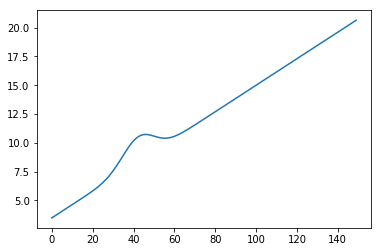

In [104]:
print("input For Non Noisy Data")
plt.plot(signw[3])
plt.show()

input For Noisy Data


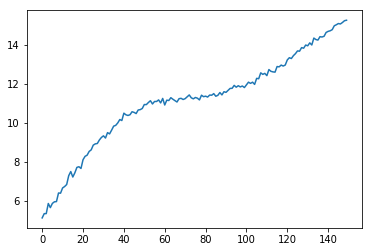

In [105]:
print("input For Noisy Data")
plt.plot(signw2[9])
plt.show()